In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [33]:
stocks = pd.read_csv('stocks_unclean.csv', sep = ',')

In [34]:
stocks.head()

,date,variable,value
0,2020-07-14,high_AAPL,9.725500e+01
1,2021-10-22,volume_AMZN,3.139100e+06
2,2021-06-04,volume_MSFT,2.528110e+07
3,2021-06-28,volume_AMZN,2.242800e+06
4,2021-11-23,low_GOOG,NaN


## 1. Create the following dataset (1 point)

* One column per stock and concept: Open, High, Low, Close, per stock
* Date as index

Be ready for dealing with errors in the names and some missing values.

In [35]:
# To make date as an index
def date_column_to_index(df, date_column_name):
    df[date_column_name] = pd.to_datetime(df[date_column_name])
    df.set_index(date_column_name, inplace = True)
    return df

In [36]:
#Google
open_googl = stocks[(stocks["variable"] == "open_GOOG")]
close_googl = stocks[(stocks["variable"] == "close_GOOG")]
high_googl = stocks[(stocks["variable"] == "high_GOOG")]
low_googl = stocks[(stocks["variable"] == "low_GOOG")]
volume_googl = stocks[(stocks["variable"] == "volume_GOOG")]

#Apple
open_aapl = stocks[(stocks["variable"] == "open_AAPL")]
close_aapl = stocks[(stocks["variable"] == "close_AAPL")]
high_aapl = stocks[(stocks["variable"] == "high_AAPL")]
low_aapl = stocks[(stocks["variable"] == "low_AAPL")]
volume_aapl = stocks[(stocks["variable"] == "volume_AAPL")]

#Microsoft
open_msft = stocks[(stocks["variable"] == "open_MSFT")]
close_msft = stocks[(stocks["variable"] == "close_MSFT")]
high_msft = stocks[(stocks["variable"] == "high_MSFT")]
low_msft = stocks[(stocks["variable"] == "low_MSFT")]
volume_msft = stocks[(stocks["variable"] == "volume_MSFT")]

#Amazon
open_amzn = stocks[(stocks["variable"] == "open_AMZN")]
close_amzn = stocks[(stocks["variable"] == "close_AMZN")]
high_amzn = stocks[(stocks["variable"] == "high_AMZN")]
low_amzn = stocks[(stocks["variable"] == "low_AMZN")]
volume_amzn = stocks[(stocks["variable"] == "volume_AMZN")]

In [37]:
#I will treat every null value in these csv by interpolation which I believe that is the easiest and faster way.
#Dealing with Google nulls
Open_googl = open_googl.interpolate(method = "linear", limit_direction = "forward")
Close_googl = close_googl.interpolate(method = "linear", limit_direction = "forward")
High_googl = high_googl.interpolate(method = "linear", limit_direction = "forward")
Low_googl = low_googl.interpolate(method = "linear", limit_direction = "forward")
Volume_googl = volume_googl.interpolate(method = "linear", limit_direction = "forward")

#Dealing with Apple nulls
Open_aapl = open_aapl.interpolate(method = "linear", limit_direction = "forward")
Close_aapl = close_aapl.interpolate(method = "linear", limit_direction = "forward")
High_aapl = high_aapl.interpolate(method = "linear", limit_direction = "forward")
Low_aapl = low_aapl.interpolate(method = "linear", limit_direction = "forward")
Volume_aapl = volume_aapl.interpolate(method = "linear", limit_direction = "forward")

#Dealing with Microsoft nulls
Open_msft = open_msft.interpolate(method = "linear", limit_direction = "forward")
Close_msft = close_msft.interpolate(method = "linear", limit_direction = "forward")
High_msft = high_msft.interpolate(method = "linear", limit_direction = "forward")
Low_msft = low_msft.interpolate(method = "linear", limit_direction = "forward")
Volume_msft = volume_msft.interpolate(method = "linear", limit_direction = "forward")

#Dealing with Amazon nulls
Open_amzn = open_amzn.interpolate(method = "linear", limit_direction = "forward")
Close_amzn = close_amzn.interpolate(method = "linear", limit_direction = "forward")
High_amzn = high_amzn.interpolate(method = "linear", limit_direction = "forward")
Low_amzn = low_amzn.interpolate(method = "linear", limit_direction = "forward")
Volume_amzn = volume_amzn.interpolate(method = "linear", limit_direction = "forward")

In [38]:
#Droping the variable column so it is more asthetic of Google
Open_GOOGL = Open_googl.drop(["variable"],axis = 1)
Close_GOOGL = Close_googl.drop(["variable"],axis = 1)
High_GOOGL = High_googl.drop(["variable"],axis = 1)
Low_GOOGL = Low_googl.drop(["variable"],axis = 1)
Volume_GOOGL = Volume_googl.drop(["variable"],axis = 1)

#Droping the variable column so it is more asthetic of Apple
Open_AAPL = Open_aapl.drop(["variable"],axis = 1)
Close_AAPL = Close_aapl.drop(["variable"],axis = 1)
High_AAPL = High_aapl.drop(["variable"],axis = 1)
Low_AAPL = Low_aapl.drop(["variable"],axis = 1)
Volume_AAPL = Volume_aapl.drop(["variable"],axis = 1)

#Droping the variable column so it is more asthetic of Microsoft
Open_MSFT = Open_msft.drop(["variable"],axis = 1)
Close_MSFT = Close_msft.drop(["variable"],axis = 1)
High_MSFT = High_msft.drop(["variable"],axis = 1)
Low_MSFT = Low_msft.drop(["variable"],axis = 1)
Volume_MSFT = Volume_msft.drop(["variable"],axis = 1)

#Droping the variable column so it is more asthetic of Amazon
Open_AMZN = Open_amzn.drop(["variable"],axis = 1)
Close_AMZN = Close_amzn.drop(["variable"],axis = 1)
High_AMZN = High_amzn.drop(["variable"],axis = 1)
Low_AMZN = Low_amzn.drop(["variable"],axis = 1)
Volume_AMZN = Volume_amzn.drop(["variable"],axis = 1)

In [39]:
#Now is time to merge all the columns which I treat them individually into one big DataFrame by the name of the stock (Google)
g1 = Open_googl.pivot(index = "date", columns = "variable", values = "value")
g2 = Close_googl.pivot(index = "date", columns = "variable", values = "value")
g3 = High_googl.pivot(index = "date", columns = "variable", values = "value")
g4 = Low_googl.pivot(index = "date", columns = "variable", values = "value")
g5 = Volume_googl.pivot(index = "date", columns = "variable", values = "value")

g11 = pd.merge(g1, g2, on = ["date"])
g12 = pd.merge(g3, g4, on = ["date"])
g13 = pd.merge(g4, g5, on = ["date"])

g111 = pd.merge(g11, g12, on = ["date"])

Google = pd.merge(g111, g13, on = ["date"])

Google.head()

variable,open_GOOG,close_GOOG,high_GOOG,low_GOOG_x,low_GOOG_y,volume_GOOG
date,,,,,,
2019-12-31,1330.109985,1337.020020,1338.000000,1329.084961,1329.084961,961800.0
2020-01-02,1341.550049,1367.369995,1368.140015,1341.550049,1341.550049,1406600.0
2020-01-03,1347.859985,1360.660034,1372.500000,1345.543945,1345.543945,1186400.0
2020-01-06,1350.000000,1394.209961,1396.500000,1678.875000,1678.875000,1732300.0
2020-01-07,1397.939941,1393.339966,1402.989990,1390.380005,1390.380005,1502700.0


In [40]:
google = pd.DataFrame(Google)

In [41]:
#Now is time to merge all the columns which I treat them individually into one big DataFrame by the name of the stock (Apple)
a1 = Open_aapl.pivot(index = "date", columns = "variable", values = "value")
a2 = Close_aapl.pivot(index = "date", columns = "variable", values = "value")
a3 = High_aapl.pivot(index = "date", columns = "variable", values = "value")
a4 = Low_aapl.pivot(index = "date", columns = "variable", values = "value")
a5 = Volume_aapl.pivot(index = "date", columns = "variable", values = "value")

a11 = pd.merge(a1, a2, on = ["date"])
a12 = pd.merge(a3, a4, on = ["date"])
a13 = pd.merge(a4, a5, on = ["date"])

a111 = pd.merge(a11, a12, on = ["date"])

Apple = pd.merge(a111, a13, on = ["date"])

Apple.head()

variable,open_AAPL,close_AAPL,high_AAPL,low_AAPL_x,low_AAPL_y,volume_AAPL
date,,,,,,
2019-12-31,72.482498,73.412498,73.419998,72.379997,72.379997,100805600.0
2020-01-02,74.059998,75.087502,75.150002,73.797501,73.797501,135480400.0
2020-01-03,74.287498,74.357498,75.144997,74.125000,74.125000,146322800.0
2020-01-06,73.447502,74.949997,74.989998,73.187500,73.187500,118387200.0
2020-01-07,74.959999,74.597504,75.224998,74.370003,74.370003,108872000.0


In [42]:
apple = pd.DataFrame(Apple)

In [43]:
#Now is time to merge all the columns which I treat them individually into one big DataFrame by the name of the stock (Microsoft)
m1 = Open_msft.pivot(index = "date", columns = "variable", values = "value")
m2 = Close_msft.pivot(index = "date", columns = "variable", values = "value")
m3 = High_msft.pivot(index = "date", columns = "variable", values = "value")
m4 = Low_msft.pivot(index = "date", columns = "variable", values = "value")
m5 = Volume_msft.pivot(index = "date", columns = "variable", values = "value")

m11 = pd.merge(m1, m2, on = ["date"])
m12 = pd.merge(m3, m4, on = ["date"])
m13 = pd.merge(m4, m5, on = ["date"])

m111 = pd.merge(m11, m12, on = ["date"])

Microsoft = pd.merge(m111, m13, on = ["date"])

Microsoft.head()

variable,open_MSFT,close_MSFT,high_MSFT,low_MSFT_x,low_MSFT_y,volume_MSFT
date,,,,,,
2019-12-31,156.770004,157.699997,157.770004,156.449997,156.449997,18369400.0
2020-01-02,158.779999,160.619995,160.729996,158.330002,158.330002,22622100.0
2020-01-03,158.320007,158.619995,159.949997,189.274994,189.274994,21116200.0
2020-01-06,157.080002,159.029999,159.100006,156.509995,156.509995,20813700.0
2020-01-07,159.320007,157.580002,159.669998,157.320007,157.320007,21634100.0


In [44]:
microsoft = pd.DataFrame(Microsoft)

In [45]:
#Now is time to merge all the columns which I treat them individually into one big DataFrame by the name of the stock (Amazon)
am1 = Open_amzn.pivot(index = "date", columns = "variable", values = "value")
am2 = Close_amzn.pivot(index = "date", columns = "variable", values = "value")
am3 = High_amzn.pivot(index = "date", columns = "variable", values = "value")
am4 = Low_amzn.pivot(index = "date", columns = "variable", values = "value")
am5 = Volume_amzn.pivot(index = "date", columns = "variable", values = "value")

am11 = pd.merge(am1, am2, on = ["date"])
am12 = pd.merge(am3, am4, on = ["date"])
am13 = pd.merge(am4, am5, on = ["date"])

am111 = pd.merge(am11, g12, on = ["date"])

Amazon = pd.merge(am111, am13, on = ["date"])

Amazon.head()

variable,open_AMZN,close_AMZN,high_GOOG,low_GOOG,low_AMZN,volume_AMZN
date,,,,,,
2019-12-31,1842.0,1847.839966,1338.000000,1329.084961,1832.229980,2506500.0
2020-01-02,1875.0,1898.010010,1368.140015,1341.550049,1864.150024,4029000.0
2020-01-03,1864.5,1874.969971,1372.500000,1345.543945,1864.500000,3764400.0
2020-01-06,1860.0,1902.880005,1396.500000,1678.875000,1860.000000,4061800.0
2020-01-07,1904.5,1906.859985,1402.989990,1390.380005,1892.040039,4044900.0


In [46]:
amazon = pd.DataFrame(Amazon)

In [47]:
#In these DataFrame I will join every stock table together
t1 = pd.merge(Google, Apple, on = ["date"])
t2 = pd.merge(Microsoft, Amazon, on = ["date"])
Together = pd.merge(t1, t2, on = ["date"])

together = pd.DataFrame(Together)
together

variable,open_GOOG,close_GOOG,high_GOOG_x,low_GOOG_x,low_GOOG_y,volume_GOOG,open_AAPL,close_AAPL,high_AAPL,low_AAPL_x,...,high_MSFT,low_MSFT_x,low_MSFT_y,volume_MSFT,open_AMZN,close_AMZN,high_GOOG_y,low_GOOG,low_AMZN,volume_AMZN
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,1330.109985,1337.020020,1338.000000,1329.084961,1329.084961,961800.0,72.482498,73.412498,73.419998,72.379997,...,157.770004,156.449997,156.449997,18369400.0,1842.000000,1847.839966,1338.000000,1329.084961,1832.229980,2506500.0
2020-01-02,1341.550049,1367.369995,1368.140015,1341.550049,1341.550049,1406600.0,74.059998,75.087502,75.150002,73.797501,...,160.729996,158.330002,158.330002,22622100.0,1875.000000,1898.010010,1368.140015,1341.550049,1864.150024,4029000.0
2020-01-03,1347.859985,1360.660034,1372.500000,1345.543945,1345.543945,1186400.0,74.287498,74.357498,75.144997,74.125000,...,159.949997,189.274994,189.274994,21116200.0,1864.500000,1874.969971,1372.500000,1345.543945,1864.500000,3764400.0
2020-01-06,1350.000000,1394.209961,1396.500000,1678.875000,1678.875000,1732300.0,73.447502,74.949997,74.989998,73.187500,...,159.100006,156.509995,156.509995,20813700.0,1860.000000,1902.880005,1396.500000,1678.875000,1860.000000,4061800.0
2020-01-07,1397.939941,1393.339966,1402.989990,1390.380005,1390.380005,1502700.0,74.959999,74.597504,75.224998,74.370003,...,159.669998,157.320007,157.320007,21634100.0,1904.500000,1906.859985,1402.989990,1390.380005,1892.040039,4044900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,2738.770020,2713.040039,2767.989990,2710.000000,2710.000000,1039800.0,170.000000,166.229996,171.080002,165.940002,...,313.910004,302.700012,302.700012,45933900.0,3175.239990,3125.979980,2767.989990,2710.000000,3125.000000,2662100.0
2022-01-20,2730.280029,2670.129883,2758.239990,2662.889893,2662.889893,1096500.0,166.979996,164.509995,169.679993,164.179993,...,311.649994,301.140015,301.140015,35380700.0,3135.320068,3033.350098,2758.239990,2662.889893,3027.020020,3598700.0
2022-01-21,2660.239990,2601.840088,2695.209961,2600.020020,2600.020020,2087000.0,164.419998,162.410004,166.330002,162.300003,...,304.109985,295.609985,295.609985,57118300.0,2999.000000,2852.860107,2695.209961,2600.020020,2841.409912,8164200.0


## 2. Visualize the data (1.5 point)

* Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points)
* Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
* Add meaningful visualizations of your choice (0.5 point)

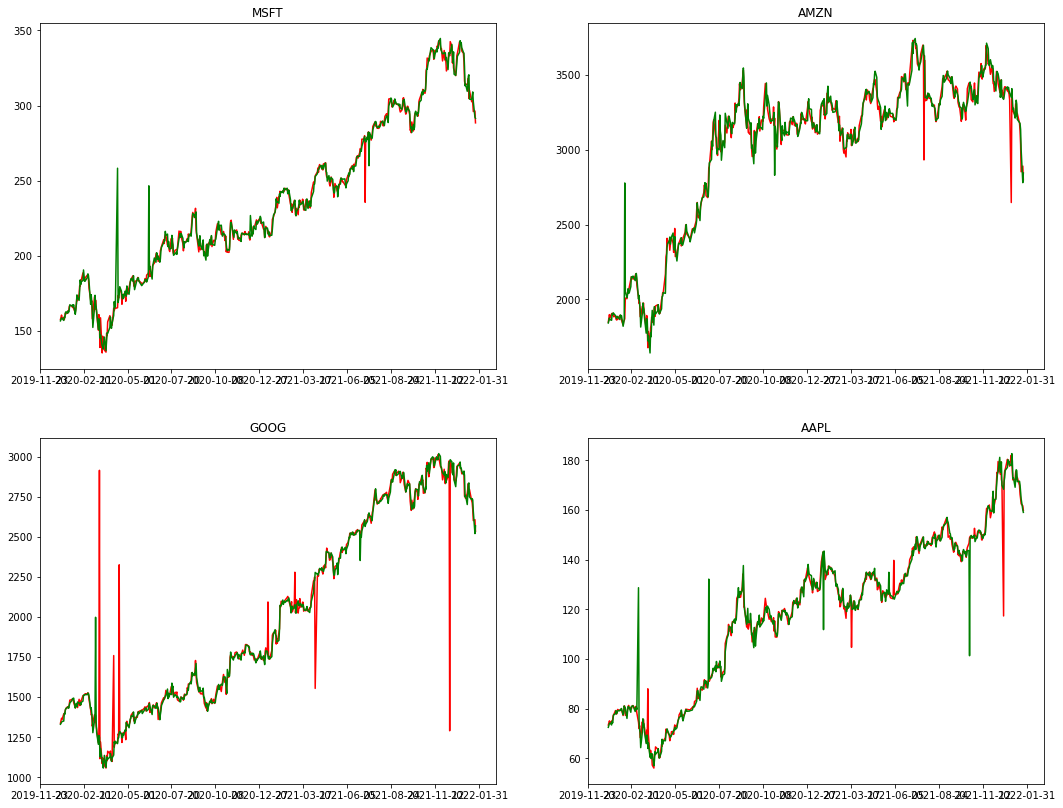

In [58]:
fig, axis = plt.subplots(2, 2, figsize=(18,14))

# For MSFT
axis[0, 0].plot(together['close_MSFT'], color='red')
axis[0, 0].plot(together['open_MSFT'], color='green')
axis[0, 0].set_title("MSFT")
start, end = axis[0, 0].get_xlim()
axis[0, 0].xaxis.set_ticks(np.arange(start, end, 80))

# For AMZN
axis[0, 1].plot(together['close_AMZN'], color='red')
axis[0, 1].plot(together['open_AMZN'], color='green')
axis[0, 1].set_title("AMZN")
start, end = axis[0, 1].get_xlim()
axis[0, 1].xaxis.set_ticks(np.arange(start, end, 80))

# # For GOOG
axis[1, 0].plot(together['close_GOOG'], color='red')
axis[1, 0].plot(together['open_GOOG'], color='green')
axis[1, 0].set_title("GOOG")
start, end = axis[1, 0].get_xlim()
axis[1, 0].xaxis.set_ticks(np.arange(start, end, 80))

# # For AAPL
axis[1, 1].plot(together['close_AAPL'], color='red')
axis[1, 1].plot(together['open_AAPL'], color='green')
axis[1, 1].set_title("AAPL")
start, end = axis[1, 1].get_xlim()
axis[1, 1].xaxis.set_ticks(np.arange(start, end, 80))

# Combine all the operations and display
plt.show()

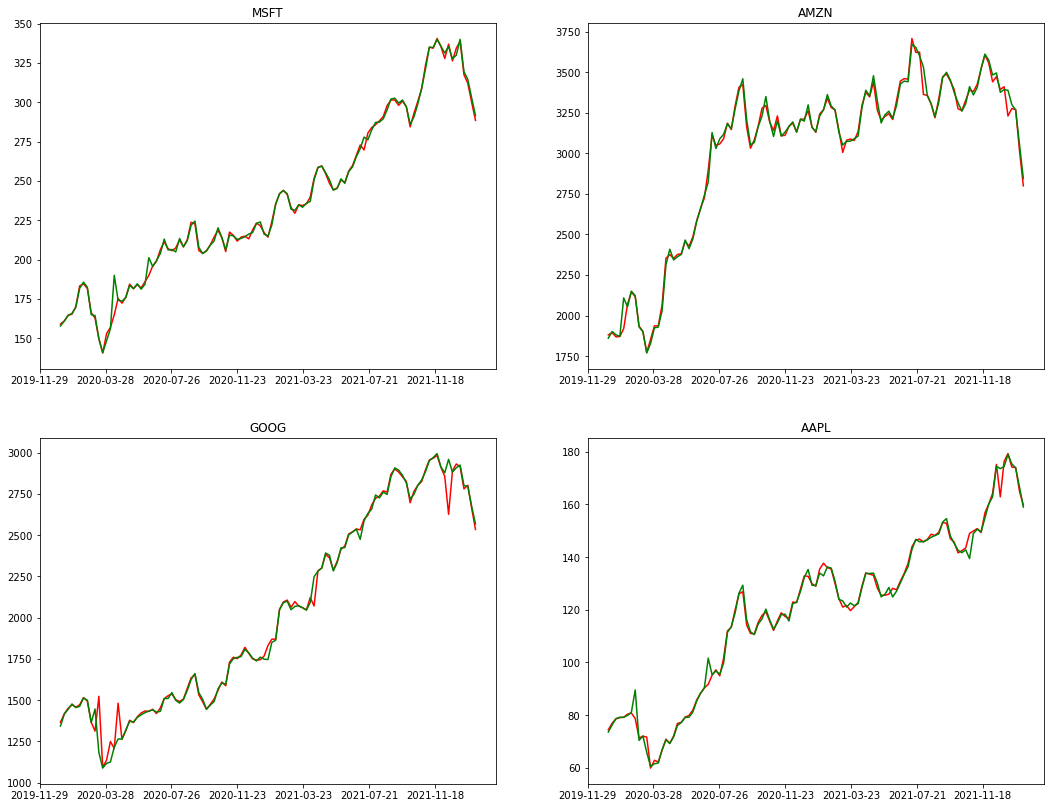

In [59]:
fig, axis = plt.subplots(2, 2, figsize=(18,14))
together.index = pd.to_datetime(together.index)

# For MSFT
axis[0, 0].plot(together['close_MSFT'].resample('W-MON').mean(), color='red')
axis[0, 0].plot(together['open_MSFT'].resample('W-MON').mean(), color='green')
axis[0, 0].set_title("MSFT")
start, end = axis[0, 0].get_xlim()
axis[0, 0].xaxis.set_ticks(np.arange(start, end, 120))

# For AMZN
axis[0, 1].plot(together['close_AMZN'].resample('W-MON').mean(), color='red')
axis[0, 1].plot(together['open_AMZN'].resample('W-MON').mean(), color='green')
axis[0, 1].set_title("AMZN")
start, end = axis[0, 1].get_xlim()
axis[0, 1].xaxis.set_ticks(np.arange(start, end, 120))

# # For GOOG
axis[1, 0].plot(together['close_GOOG'].resample('W-MON').mean(), color='red')
axis[1, 0].plot(together['open_GOOG'].resample('W-MON').mean(), color='green')
axis[1, 0].set_title("GOOG")
start, end = axis[1, 0].get_xlim()
axis[1, 0].xaxis.set_ticks(np.arange(start, end, 120))

# # For AAPL
axis[1, 1].plot(together['close_AAPL'].resample('W-MON').mean(), color='red')
axis[1, 1].plot(together['open_AAPL'].resample('W-MON').mean(), color='green')
axis[1, 1].set_title("AAPL")
start, end = axis[1, 1].get_xlim()
axis[1, 1].xaxis.set_ticks(np.arange(start, end, 120))

# Combine all the operations and display
plt.show()

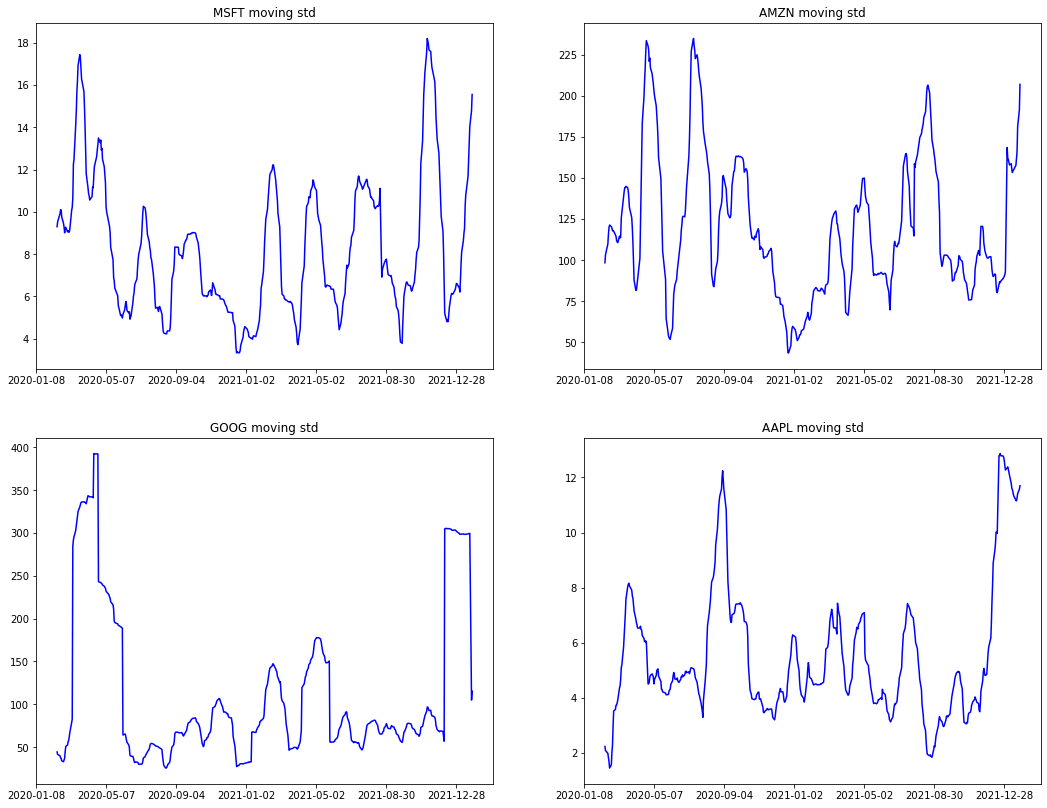

In [62]:
fig, axis = plt.subplots(2, 2, figsize=(18,14))
together.index = pd.to_datetime(together.index)

days = 30

# For MSFT
axis[0, 0].plot(together['close_MSFT'].dropna().rolling(days).std(), color='blue')
axis[0, 0].set_title("MSFT moving std")
start, end = axis[0, 0].get_xlim()
axis[0, 0].xaxis.set_ticks(np.arange(start, end, 120))

# For AMZN
axis[0, 1].plot(together['close_AMZN'].dropna().rolling(days).std(), color='blue')
axis[0, 1].set_title("AMZN moving std")
start, end = axis[0, 1].get_xlim()
axis[0, 1].xaxis.set_ticks(np.arange(start, end, 120))

# # For GOOG
axis[1, 0].plot(together['close_GOOG'].dropna().rolling(days).std(), color='blue')
axis[1, 0].set_title("GOOG moving std")
start, end = axis[1, 0].get_xlim()
axis[1, 0].xaxis.set_ticks(np.arange(start, end, 120))

# # For AAPL
axis[1, 1].plot(together['close_AAPL'].dropna().rolling(days).std(), color='blue')
axis[1, 1].set_title("AAPL moving std")
start, end = axis[1, 1].get_xlim()
axis[1, 1].xaxis.set_ticks(np.arange(start, end, 120))

# Combine all the operations and display
plt.show()

## 3. Create a function that calculates the Return of Investment (ROI) (1 point)

Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it.

$$ ROI = \frac{FVI - IVI}{IVI} * 100$$

* IVI: initial value of investment. This is the price at which you bought the stock
* FVI: final value of investment. This is the price at which you sold the stock
* ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:
* lookback: the number of days you hold the stock
* name: the name of the stock, using the "Close" value of the stock
* data: the dataframe with the stock data

In [63]:
# We have our dataset for every stock, with the close price, and have all the prices together in a pandas series.
# By using the forumla ROI = (price today - price yesterday) / price yesterday
# What I am going to do in these part is you buy one stock of these big 4 companies and you hold it for 365, 180 and 90 days
# Then at the end of that period you will sell it
# We will create a new column called adj_close in which will appear how much we gain by holding that particular stock for that particular period of time

In [64]:
GOOG_close = together[['close_GOOG']]
GOOG_close['ticker'] = 'GOOG'
GOOG_close.columns = GOOG_close.columns.str.replace("close_GOOG","adj_close")

AMZN_close = together[['close_AMZN']]
AMZN_close['ticker'] = 'AMZN'
AMZN_close.columns = AMZN_close.columns.str.replace("close_AMZN","adj_close")

MSFT_close = together[['close_MSFT']]
MSFT_close.columns = MSFT_close.columns.str.replace("close_MSFT","adj_close")
MSFT_close['ticker'] = 'MSFT'

AAPL_close = together[['close_AAPL']]
AAPL_close.columns = AAPL_close.columns.str.replace("close_AAPL","adj_close")
AAPL_close['ticker'] = 'AAPL'

<ipython-input-64-6a649b1bfdcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOOG_close['ticker'] = 'GOOG'
<ipython-input-64-6a649b1bfdcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_close['ticker'] = 'AMZN'
<ipython-input-64-6a649b1bfdcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [65]:
GOOG_close.head()

variable,adj_close,ticker
date,,
2019-12-31,1337.020020,GOOG
2020-01-02,1367.369995,GOOG
2020-01-03,1360.660034,GOOG
2020-01-06,1394.209961,GOOG
2020-01-07,1393.339966,GOOG


In [72]:
def ROI_calculation(dataframe, lookback):
    if lookback == "365_days":
        lookback = -365
        close = dataframe["adj_close"]
        ROI_365_days = pd.DataFrame(100 * (close.shift(lookback) / close - 1))
    
    elif lookback == "180_days":
        lookback = -180
        close = dataframe["adj_close"]
        ROI_180_days = pd.DataFrame(100 * (close.shift(lookback) / close - 1))
    
    elif lookback == "90_days":
        lookback = -90
        close = dataframe["adj_close"]
        ROI_90_days = pd.DataFrame(100 * (close.shift(lookback) / close - 1))
    
    return ROI_180_days

# To be able to observe each different ROI returns you will need to change te day on "return ROI_90_days" to 365, 180 o 90
# Then run the cell were the specific date is in it
# Change it again to see the different options of dates

In [70]:
ROI_365days_GOOG = ROI_calculation(GOOG_close, "365_days")
ROI_365days_AAPL = ROI_calculation(AAPL_close, "365_days")
ROI_365days_MSFT = ROI_calculation(MSFT_close, "365_days")
ROI_365days_AMZN = ROI_calculation(AMZN_close, "365_days")

In [71]:
ROI_365days_GOOG.head()

,adj_close
date,
2019-12-31,95.305978
2020-01-02,91.600657
2020-01-03,94.144741
2020-01-06,88.302347
2020-01-07,89.251007


In [73]:
ROI_180days_GOOG = ROI_calculation(GOOG_close, "180_days")
ROI_180days_AAPL = ROI_calculation(AAPL_close, "180_days")
ROI_180days_MSFT = ROI_calculation(MSFT_close, "180_days")
ROI_180days_AMZN = ROI_calculation(AMZN_close, "180_days")

In [74]:
ROI_180days_GOOG.head()

,adj_close
date,
2019-12-31,11.448590
2020-01-02,6.658772
2020-01-03,9.213175
2020-01-06,4.739607
2020-01-07,6.645190


In [67]:
ROI_90days_GOOG = ROI_calculation(GOOG_close, "90_days")
ROI_90days_AAPL = ROI_calculation(AAPL_close, "90_days")
ROI_90days_MSFT = ROI_calculation(MSFT_close, "90_days")
ROI_90days_AMZN = ROI_calculation(AMZN_close, "90_days")

In [68]:
ROI_90days_GOOG.head()

,adj_close
date,
2019-12-31,1.429297
2020-01-02,0.425631
2020-01-03,0.942554
2020-01-06,0.897283
2020-01-07,0.678950


## 4. Apply the roi function to the portfolio (1.5 point)

Create as many ROI columns as different stocks you have in the portfolio and plot them in a 2x2 grid, representing for each stock:
* ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
* ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
* ROI after holding the stock for 90 days (green, solid line) (0.5 points)

##### Note

I will plot each timeset in different 2x2 grid

In [75]:
#We are going to get the close value of each DataFrame (each different stock)
m_close = Microsoft["close_MSFT"]
am_close = Amazon["close_AMZN"]
a_close = Apple["close_AAPL"]
g_close = Google["close_GOOG"]

Text(0.5, 1.0, 'ROI after holding Google 365 days')

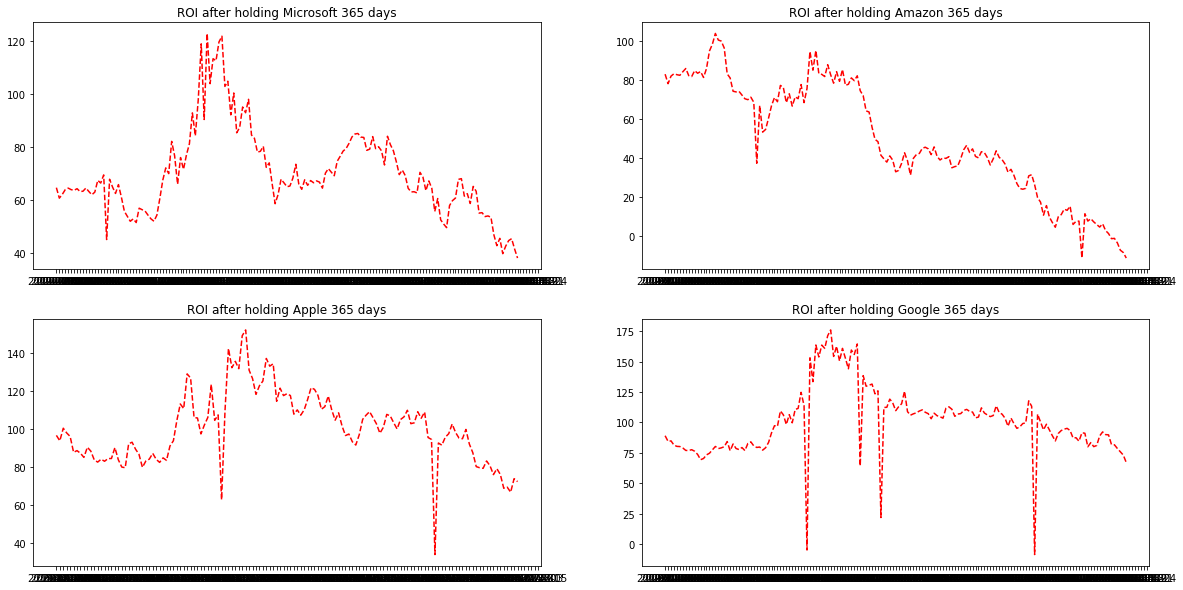

In [76]:
#We are going to lookback 365 days in our DataFrame of each individual stock and plot them each them in differents boxes
lookback_1 = -365
ROI_m1 = 100 * (m_close.shift(lookback_1) / m_close - 1)
ROI_am1 = 100 * (am_close.shift(lookback_1) / am_close - 1)
ROI_a1 = 100 * (a_close.shift(lookback_1) / a_close - 1)
ROI_g1 = 100 * (g_close.shift(lookback_1) / g_close - 1)

fig, ax = plt.subplots(2,2,figsize = (20,10))

ax[0,0].plot(ROI_m1.index, ROI_m1, label = "microsoft", color = "red", linestyle = "dashed")
ax[0,1].plot(ROI_am1.index, ROI_am1, label = "amazon", color = "red", linestyle = "dashed")
ax[1,0].plot(ROI_a1.index, ROI_a1, label = "apple", color = "red", linestyle = "dashed")
ax[1,1].plot(ROI_g1.index, ROI_g1, label = "google", color = "red", linestyle = "dashed")

ax[0,0].set_title('ROI after holding Microsoft 365 days')
ax[0,1].set_title('ROI after holding Amazon 365 days')
ax[1,0].set_title('ROI after holding Apple 365 days')
ax[1,1].set_title('ROI after holding Google 365 days')

Text(0.5, 1.0, 'ROI after holding Google 180 days')

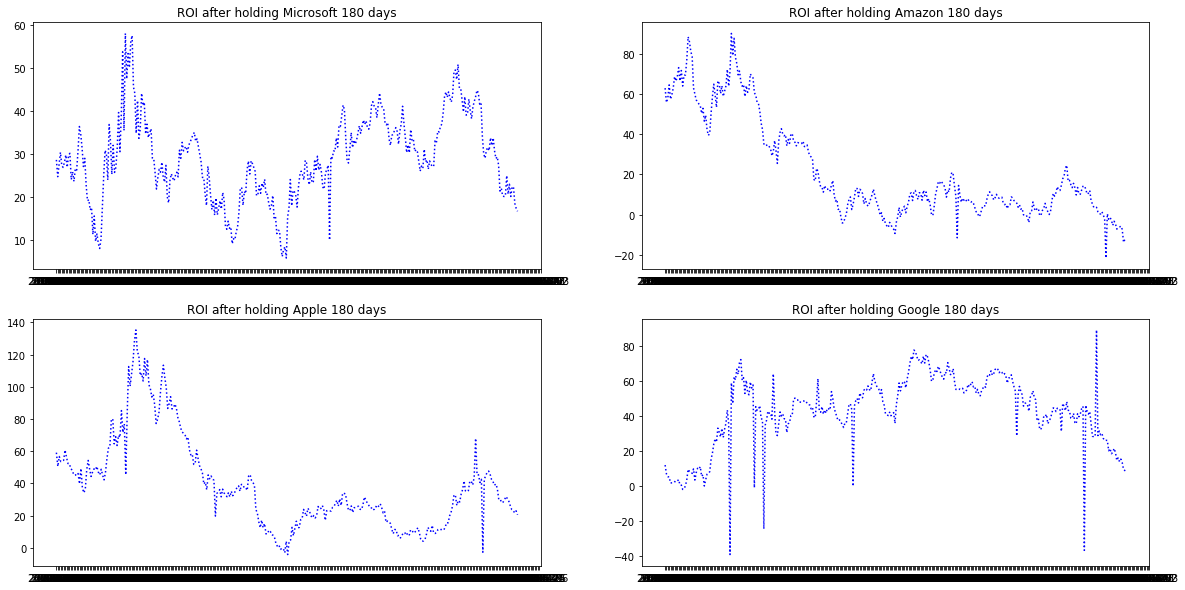

In [77]:
#We are going to lookback 180 days in our DataFrame of each individual stock and plot them each them in differents boxes
lookback_2 = -180
ROI_m2 = 100 * (m_close.shift(lookback_2) / m_close - 1)
ROI_am2 = 100 * (am_close.shift(lookback_2) / am_close - 1)
ROI_a2 = 100 * (a_close.shift(lookback_2) / a_close - 1)
ROI_g2 = 100 * (g_close.shift(lookback_2) / g_close - 1)

fig, ax = plt.subplots(2,2,figsize = (20,10))

ax[0,0].plot(ROI_m2.index, ROI_m2, label = "microsoft", color = "blue", linestyle = "dotted")
ax[0,1].plot(ROI_am2.index, ROI_am2, label = "amazon", color = "blue", linestyle = "dotted")
ax[1,0].plot(ROI_a2.index, ROI_a2, label = "apple", color = "blue", linestyle = "dotted")
ax[1,1].plot(ROI_g2.index, ROI_g2, label = "google", color = "blue", linestyle = "dotted")

ax[0,0].set_title('ROI after holding Microsoft 180 days')
ax[0,1].set_title('ROI after holding Amazon 180 days')
ax[1,0].set_title('ROI after holding Apple 180 days')
ax[1,1].set_title('ROI after holding Google 180 days')



Text(0.5, 1.0, 'ROI after holding Google 90 days')

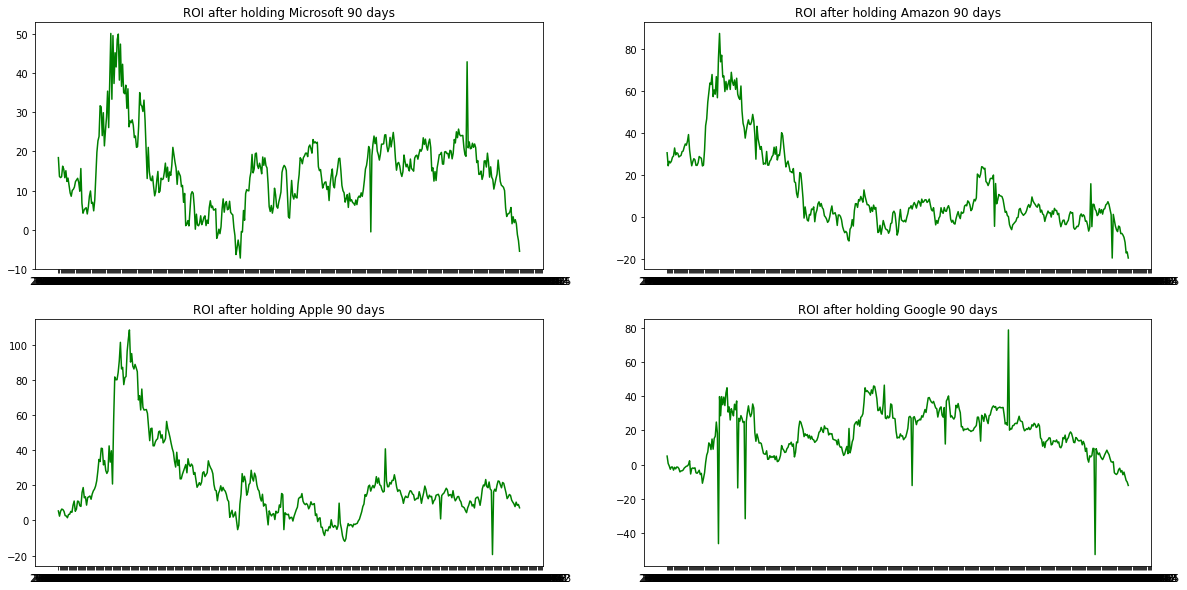

In [78]:
#We are going to lookback 90 days in our DataFrame of each individual stock and plot them each them in differents boxes
lookback_3 = -90
ROI_m3 = 100 * (m_close.shift(lookback_3) / m_close - 1)
ROI_am3 = 100 * (am_close.shift(lookback_3) / am_close - 1)
ROI_a3 = 100 * (a_close.shift(lookback_3) / a_close - 1)
ROI_g3 = 100 * (g_close.shift(lookback_3) / g_close - 1)

fig, ax = plt.subplots(2,2,figsize = (20,10))

ax[0,0].plot(ROI_m3.index, ROI_m3, label = "microsoft", color = "green", linestyle = "solid")
ax[0,1].plot(ROI_am3.index, ROI_am3, label = "amazon", color = "green", linestyle = "solid")
ax[1,0].plot(ROI_a3.index, ROI_a3, label = "apple", color = "green", linestyle = "solid")
ax[1,1].plot(ROI_g3.index, ROI_g3, label = "google", color = "green", linestyle = "solid")

ax[0,0].set_title('ROI after holding Microsoft 90 days')
ax[0,1].set_title('ROI after holding Amazon 90 days')
ax[1,0].set_title('ROI after holding Apple 90 days')
ax[1,1].set_title('ROI after holding Google 90 days')

## 5. Optimizing portfolio (1 point)

Given these two portfolios, which one has the best ROI? Keep in mind that ROI is a percentage and you can't average it directly -- you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period.

* Portfolio 1:
    * AAPL 40%
    * GOOG 30%
    * MSFT 20%
    * AMZN 10%


* Portfolio 2:
    * AAPL 30%
    * GOOG 20%
    * MSFT 10%
    * AMZN 40%

In [79]:
# In these next two exercise we will merge the answer of Q3 with the column of Close for each stock
# Change a column name to from adj_close to ROI_return so it is more clear and easiet to see

In [80]:
GOOG_returns_365 = pd.merge(GOOG_close, ROI_365days_GOOG, on = ["date"])
GOOG_returns_365.columns = GOOG_returns_365.columns.str.replace("adj_close_y", "ROI_return")

AAPL_returns_365 = pd.merge(AAPL_close, ROI_365days_AAPL, on = ["date"])
AAPL_returns_365.columns = AAPL_returns_365.columns.str.replace("adj_close_y", "ROI_return")

MSFT_returns_365 = pd.merge(MSFT_close, ROI_365days_MSFT, on = ["date"])
MSFT_returns_365.columns = MSFT_returns_365.columns.str.replace("adj_close_y", "ROI_return")

AMZN_returns_365 = pd.merge(AMZN_close, ROI_365days_AMZN, on = ["date"])
AMZN_returns_365.columns = AMZN_returns_365.columns.str.replace("adj_close_y", "ROI_return")

In [81]:
GOOG_returns_365.head()

,adj_close_x,ticker,ROI_return
date,,,
2019-12-31,1337.020020,GOOG,95.305978
2020-01-02,1367.369995,GOOG,91.600657
2020-01-03,1360.660034,GOOG,94.144741
2020-01-06,1394.209961,GOOG,88.302347
2020-01-07,1393.339966,GOOG,89.251007


In [82]:
GOOG_returns_180 = pd.merge(AAPL_close, ROI_180days_GOOG, on = ["date"])
GOOG_returns_180.columns = GOOG_returns_180.columns.str.replace("adj_close_y", "ROI_return")

AAPL_returns_180 = pd.merge(AAPL_close, ROI_180days_AAPL, on = ["date"])
AAPL_returns_180.columns = AAPL_returns_180.columns.str.replace("adj_close_y", "ROI_return")

MSFT_returns_180 = pd.merge(MSFT_close, ROI_180days_MSFT, on = ["date"])
MSFT_returns_180.columns = MSFT_returns_180.columns.str.replace("adj_close_y", "ROI_return")

AMZN_returns_180 = pd.merge(AMZN_close, ROI_180days_AMZN, on = ["date"])
AMZN_returns_180.columns = AMZN_returns_180.columns.str.replace("adj_close_y", "ROI_return")

In [83]:
GOOG_returns_180.head()

,adj_close_x,ticker,ROI_return
date,,,
2019-12-31,73.412498,AAPL,11.448590
2020-01-02,75.087502,AAPL,6.658772
2020-01-03,74.357498,AAPL,9.213175
2020-01-06,74.949997,AAPL,4.739607
2020-01-07,74.597504,AAPL,6.645190


In [84]:
GOOG_returns_90 = pd.merge(GOOG_close, ROI_90days_GOOG, on = ["date"])
GOOG_returns_90.columns = GOOG_returns_90.columns.str.replace("adj_close_y", "ROI_return")

AAPL_returns_90 = pd.merge(AAPL_close, ROI_90days_AAPL, on = ["date"])
AAPL_returns_90.columns = AAPL_returns_90.columns.str.replace("adj_close_y", "ROI_return")

MSFT_returns_90 = pd.merge(MSFT_close, ROI_90days_MSFT, on = ["date"])
MSFT_returns_90.columns = MSFT_returns_90.columns.str.replace("adj_close_y", "ROI_return")

AMZN_returns_90 = pd.merge(AMZN_close, ROI_90days_AMZN, on = ["date"])
AMZN_returns_90.columns = AMZN_returns_90.columns.str.replace("adj_close_y", "ROI_return")

In [85]:
GOOG_returns_90.head()

,adj_close_x,ticker,ROI_return
date,,,
2019-12-31,1337.020020,GOOG,1.429297
2020-01-02,1367.369995,GOOG,0.425631
2020-01-03,1360.660034,GOOG,0.942554
2020-01-06,1394.209961,GOOG,0.897283
2020-01-07,1393.339966,GOOG,0.678950


In [86]:
# We are going to create a new column called "x days of return" x being how much days will you be looking back in the period of time
# These new column will be the result the close price * ROI

GOOG_returns_365["365 days returns"] = GOOG_returns_365["adj_close_x"] * GOOG_returns_365["ROI_return"]
AAPL_returns_365["365 days returns"] = AAPL_returns_365["adj_close_x"] * AAPL_returns_365["ROI_return"]
MSFT_returns_365["365 days returns"] = MSFT_returns_365["adj_close_x"] * MSFT_returns_365["ROI_return"]
AMZN_returns_365["365 days returns"] = AMZN_returns_365["adj_close_x"] * AMZN_returns_365["ROI_return"]

GOOG_returns_180["180 days returns"] = GOOG_returns_180["adj_close_x"] * GOOG_returns_180["ROI_return"]
AAPL_returns_180["180 days returns"] = AAPL_returns_180["adj_close_x"] * AAPL_returns_180["ROI_return"]
MSFT_returns_180["180 days returns"] = MSFT_returns_180["adj_close_x"] * MSFT_returns_180["ROI_return"]
AMZN_returns_180["180 days returns"] = AMZN_returns_180["adj_close_x"] * AMZN_returns_180["ROI_return"]

GOOG_returns_90["90 days returns"] = GOOG_returns_90["adj_close_x"] * GOOG_returns_90["ROI_return"]
AAPL_returns_90["90 days returns"] = AAPL_returns_90["adj_close_x"] * AAPL_returns_90["ROI_return"]
MSFT_returns_90["90 days returns"] = MSFT_returns_90["adj_close_x"] * MSFT_returns_90["ROI_return"]
AMZN_returns_90["90 days returns"] = AMZN_returns_90["adj_close_x"] * AMZN_returns_90["ROI_return"]

In [87]:
GOOG_returns_365.head()

,adj_close_x,ticker,ROI_return,365 days returns
date,,,,
2019-12-31,1337.020020,GOOG,95.305978,127426.000977
2020-01-02,1367.369995,GOOG,91.600657,125251.989746
2020-01-03,1360.660034,GOOG,94.144741,128098.986816
2020-01-06,1394.209961,GOOG,88.302347,123112.011719
2020-01-07,1393.339966,GOOG,89.251007,124356.994629


In [88]:
# I am going to create a function in which you are able to place the dataframe and the probability that you wish.
# The function will get the value of the column (X days return) and multiply it by the %, and then return the mean of all the values
# At the end of the function I would up together all the returns of that portfolio of that particular time period
# When all the means are calculated in a different cell, I would deploy the function and round up the solution to 2 decimal places

In [89]:
def portfolio_1_90_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 40
    p1 = 0.4
    total_returns_df1 = (df1["90 days returns"].mean()) * p1
    p2 == 30
    p2 = 0.3
    total_returns_df2 = (df2["90 days returns"].mean()) * p2
    p3 == 20
    p3 = 0.2
    total_returns_df3 = (df3["90 days returns"].mean()) * p3
    p4 == 10
    p4 = 0.1
    total_returns_df4 = (df4["90 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [90]:
p_1_90 = round(portfolio_1_90_days(AAPL_returns_90, 40, GOOG_returns_90, 30, MSFT_returns_90, 20, AMZN_returns_90, 10), 2)

p_1_90

13976.37

In [91]:
def portfolio_1_180_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 40
    p1 = 0.4
    total_returns_df1 = (df1["180 days returns"].mean()) * p1
    p2 == 30
    p2 = 0.3
    total_returns_df2 = (df2["180 days returns"].mean()) * p2
    p3 == 20
    p3 = 0.2
    total_returns_df3 = (df3["180 days returns"].mean()) * p3
    p4 == 10
    p4 = 0.1
    total_returns_df4 = (df4["180 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [92]:
p_1_180 = round(portfolio_1_180_days(AAPL_returns_180, 40, GOOG_returns_180, 30, MSFT_returns_180, 20, AMZN_returns_180, 10), 2)

p_1_180

8981.94

In [93]:
def portfolio_1_365_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 40
    p1 = 0.4
    total_returns_df1 = (df1["365 days returns"].mean()) * p1
    p2 == 30
    p2 = 0.3
    total_returns_df2 = (df2["365 days returns"].mean()) * p2
    p3 == 20
    p3 = 0.2
    total_returns_df3 = (df3["365 days returns"].mean()) * p3
    p4 == 10
    p4 = 0.1
    total_returns_df4 = (df4["365 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [94]:
p_1_365 = round(portfolio_1_365_days(AAPL_returns_365, 40, GOOG_returns_365, 30, MSFT_returns_365, 20, AMZN_returns_365, 10),2)

p_1_365

59317.2

In [95]:
def portfolio_2_90_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 30
    p1 = 0.3
    total_returns_df1 = (df1["90 days returns"].mean()) * p1
    p2 == 20
    p2 = 0.2
    total_returns_df2 = (df2["90 days returns"].mean()) * p2
    p3 == 10
    p3 = 0.1
    total_returns_df3 = (df3["90 days returns"].mean()) * p3
    p4 == 40
    p4 = 0.4
    total_returns_df4 = (df4["90 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [96]:
p_2_90 = round(portfolio_2_90_days(AAPL_returns_90, 30, GOOG_returns_90, 20, MSFT_returns_90, 10, AMZN_returns_90, 40), 2)

p_2_90

18966.3

In [97]:
def portfolio_2_180_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 30
    p1 = 0.3
    total_returns_df1 = (df1["180 days returns"].mean()) * p1
    p2 == 20
    p2 = 0.2
    total_returns_df2 = (df2["180 days returns"].mean()) * p2
    p3 == 10
    p3 = 0.1
    total_returns_df3 = (df3["180 days returns"].mean()) * p3
    p4 == 40
    p4 = 0.4
    total_returns_df4 = (df4["180 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [98]:
p_2_180 = round(portfolio_2_180_days(AAPL_returns_180, 30, GOOG_returns_180, 20, MSFT_returns_180, 10, AMZN_returns_180, 40), 2)

p_2_180

22234.37

In [99]:
def portfolio_2_365_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 30
    p1 = 0.3
    total_returns_df1 = (df1["365 days returns"].mean()) * p1
    p2 == 20
    p2 = 0.2
    total_returns_df2 = (df2["365 days returns"].mean()) * p2
    p3 == 10
    p3 = 0.1
    total_returns_df3 = (df3["365 days returns"].mean()) * p3
    p4 == 40
    p4 = 0.4
    total_returns_df4 = (df4["365 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [100]:
p_2_365 = round(portfolio_2_365_days(AAPL_returns_365, 30, GOOG_returns_365, 20, MSFT_returns_365, 10, AMZN_returns_365, 40), 2)

p_2_365

76342.89

Text(0, 0.5, 'Return in Dollars')

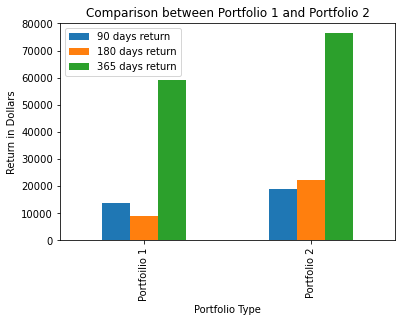

In [101]:
# To have a better view of which portfoilio is better I will plot the result of each portfolio over a period of time and compare them
# The chart will be a barchart in which you are able to observe each period of time but inside of the characteristics of that portfolio
# In which the % are crucial

plotdata = pd.DataFrame({
    "90 days return":[p_1_90, p_2_90],
    "180 days return":[p_1_180, p_2_180],
    "365 days return":[p_1_365, p_2_365]
    },
    index = ["Portfoilio 1", "Portfolio 2"]
)

plotdata.plot(kind = "bar")
plt.title("Comparison between Portfolio 1 and Portfolio 2")
plt.xlabel("Portfolio Type")
plt.ylabel("Return in Dollars")

### Comment

In general Portfolio 2 will give a highest return in average in all three periods than Portfolio 1.

But we can observe that the longer we retain the stock the higher the return the stock holder will gain.

## 6. Find a better combination in your portfolio (1 point)

The new combination should beat the best portfolio that you found in the previous exercise.

These will be the new combination of portfolios that I will use, as you could see is the same values as in Q5 but in a different arrangement as a portfolio needs to add up to 100%.

* Portfolio 3:
    * AAPL 10%
    * GOOG 40%
    * MSFT 30%
    * AMZN 20%


* Portfolio 4:
    * AAPL 20%
    * GOOG 10%
    * MSFT 40%
    * AMZN 30%

In [102]:
# Is the same principle and idea as Q5
# I am going to create a function in which you are able to place the dataframe and the probability that you wish.
# The function will get the value of the column (X days return) and multiply it by the %, and then return the mean of all the values
# At the end of the function I would up together all the returns of that portfolio of that particular time period
# When all the means are calculated in a different cell, I would deploy the function and round up the solution to 2 decimal places

In [103]:
def portfolio_3_90_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 10
    p1 = 0.1
    total_returns_df1 = (df1["90 days returns"].mean()) * p1
    p2 == 40
    p2 = 0.4
    total_returns_df2 = (df2["90 days returns"].mean()) * p2
    p3 == 30
    p3 = 0.3
    total_returns_df3 = (df3["90 days returns"].mean()) * p3
    p4 == 20
    p4 = 0.2
    total_returns_df4 = (df4["90 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [104]:
p_3_90 = round(portfolio_3_90_days(AAPL_returns_90, 10, GOOG_returns_90, 40, MSFT_returns_90, 30, AMZN_returns_90, 20), 2)

p_3_90

19872.85

In [105]:
def portfolio_3_180_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 10
    p1 = 0.1
    total_returns_df1 = (df1["180 days returns"].mean()) * p1
    p2 == 40
    p2 = 0.4
    total_returns_df2 = (df2["180 days returns"].mean()) * p2
    p3 == 30
    p3 = 0.3
    total_returns_df3 = (df3["180 days returns"].mean()) * p3
    p4 == 20
    p4 = 0.2
    total_returns_df4 = (df4["180 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [106]:
p_3_180 = round(portfolio_3_180_days(AAPL_returns_180, 10, GOOG_returns_180, 40, MSFT_returns_180, 30, AMZN_returns_180, 20), 2)

p_3_180

13948.17

In [107]:
def portfolio_3_365_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 10
    p1 = 0.1
    total_returns_df1 = (df1["365 days returns"].mean()) * p1
    p2 == 40
    p2 = 0.4
    total_returns_df2 = (df2["365 days returns"].mean()) * p2
    p3 == 30
    p3 = 0.3
    total_returns_df3 = (df3["365 days returns"].mean()) * p3
    p4 == 20
    p4 = 0.2
    total_returns_df4 = (df4["365 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [108]:
p_3_365 = round(portfolio_3_365_days(AAPL_returns_365, 10, GOOG_returns_365, 40, MSFT_returns_365, 30, AMZN_returns_365, 20), 2)

p_3_365

83593.46

In [109]:
def portfolio_4_90_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 20
    p1 = 0.2
    total_returns_df1 = (df1["90 days returns"].mean()) * p1
    p2 == 10
    p2 = 0.1
    total_returns_df2 = (df2["90 days returns"].mean()) * p2
    p3 == 40
    p3 = 0.4
    total_returns_df3 = (df3["90 days returns"].mean()) * p3
    p4 == 30
    p4 = 0.3
    total_returns_df4 = (df4["90 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [110]:
p_4_90 = round(portfolio_4_90_days(AAPL_returns_90, 20, GOOG_returns_90, 10, MSFT_returns_90, 40, AMZN_returns_90, 30), 2)

p_4_90

13645.57

In [111]:
def portfolio_4_180_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 20
    p1 = 0.2
    total_returns_df1 = (df1["180 days returns"].mean()) * p1
    p2 == 10
    p2 = 0.1
    total_returns_df2 = (df2["180 days returns"].mean()) * p2
    p3 == 40
    p3 = 0.4
    total_returns_df3 = (df3["180 days returns"].mean()) * p3
    p4 == 30
    p4 = 0.3
    total_returns_df4 = (df4["180 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [112]:
p_4_180 = round(portfolio_4_180_days(AAPL_returns_180, 20, GOOG_returns_180, 10, MSFT_returns_180, 40, AMZN_returns_180, 30), 2)

p_4_180

18368.83

In [113]:
def portfolio_4_365_days(df1, p1, df2, p2, df3, p3, df4, p4):
    p1 == 20
    p1 = 0.2
    total_returns_df1 = (df1["365 days returns"].mean()) * p1
    p2 == 10
    p2 = 0.1
    total_returns_df2 = (df2["365 days returns"].mean()) * p2
    p3 == 40
    p3 = 0.4
    total_returns_df3 = (df3["365 days returns"].mean()) * p3
    p4 == 30
    p4 = 0.3
    total_returns_df4 = (df4["365 days returns"].mean()) * p4
    
    return total_returns_df1 + total_returns_df2 + total_returns_df3 + total_returns_df4

In [114]:
p_4_365 = round(portfolio_4_365_days(AAPL_returns_365, 20, GOOG_returns_365, 10, MSFT_returns_365, 40, AMZN_returns_365, 30), 2)

p_4_365

54285.06

Text(0, 0.5, 'Return in Dollars')

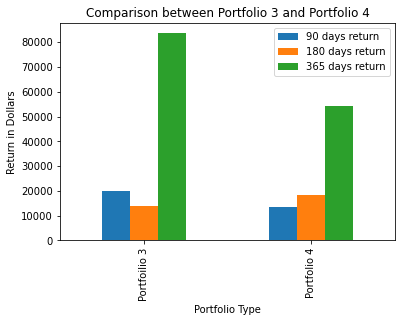

In [115]:
# To have a better view of which portfoilio is better I will plot the result of each portfolio over a period of time and compare them
# The chart will be a barchart in which you are able to observe each period of time but inside of the characteristics of that portfolio
# In which the % are crucial

plotdata = pd.DataFrame({
    "90 days return":[p_3_90, p_4_90],
    "180 days return":[p_3_180, p_4_180],
    "365 days return":[p_3_365, p_4_365]
    },
    index = ["Portfoilio 3", "Portfolio 4"]
)

plotdata.plot(kind = "bar")
plt.title("Comparison between Portfolio 3 and Portfolio 4")
plt.xlabel("Portfolio Type")
plt.ylabel("Return in Dollars")

### Comment

These new combination does surprise me more as the highest % of its stocks are from google than from microsoft. Portfoilio 3 will bring more return if you hold these portfolio for 365 days and 90 days than in Portfolio 4. However if you wish to hold a portfolio for just 180 days Portfolio 4 is the best one. 